In [1]:
from keras.datasets import mnist      #导入np_utils和numpy以及MNIST模块
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

/home/luhan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_Train,y_Train),(x_Test,y_Test) = mnist.load_data()          #打开MNIST数据

In [63]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')    #将数字图像特征值转为四维矩阵
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')
x_Train4D_normalize = x_Train4D/255                                      #将数字图像标准化
x_Test4D_normalize = x_Test4D/255

In [4]:
y_TrainOneHot = np_utils.to_categorical(y_Train)       #将数字图像真实值OneHot Ecoding转换
y_TestOnehot = np_utils.to_categorical(y_Test)

In [5]:
from keras.models import Sequential                   #导入Sequential，Dense,Dropout,Flatten,Conv2D,MaxPooling2D模块
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [6]:
model = Sequential()                                 #建立Sequential模型

In [7]:
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu'))     #建立卷积层1

In [8]:
model.add(MaxPooling2D(pool_size=(2,2)))             #建立池化层1

In [11]:
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',activation='relu'))                 #建立卷积层2

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))            #建立池化层2

In [13]:
model.add(Dropout(0.25))                            #加入Dropout避免过度拟合

In [14]:
model.add(Flatten())                                #建立平坦层

In [15]:
model.add(Dense(128,activation='relu'))             #建立隐藏层

In [16]:
model.add(Dropout(0.5))                             #加入Dropout避免过度拟合

In [17]:
model.add(Dense(10,activation='softmax'))           #建立输出层

print(model.summary())

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])     #定义训练方式

In [28]:
train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 28s - loss: 0.4900 - acc: 0.8477 - val_loss: 0.0968 - val_acc: 0.9723
Epoch 2/10
 - 27s - loss: 0.1403 - acc: 0.9580 - val_loss: 0.0629 - val_acc: 0.9803
Epoch 3/10
 - 27s - loss: 0.1020 - acc: 0.9694 - val_loss: 0.0513 - val_acc: 0.9845
Epoch 4/10
 - 27s - loss: 0.0844 - acc: 0.9749 - val_loss: 0.0463 - val_acc: 0.9862
Epoch 5/10
 - 27s - loss: 0.0713 - acc: 0.9778 - val_loss: 0.0397 - val_acc: 0.9874
Epoch 6/10
 - 27s - loss: 0.0637 - acc: 0.9806 - val_loss: 0.0390 - val_acc: 0.9883
Epoch 7/10
 - 27s - loss: 0.0559 - acc: 0.9830 - val_loss: 0.0420 - val_acc: 0.9878
Epoch 8/10
 - 27s - loss: 0.0512 - acc: 0.9843 - val_loss: 0.0335 - val_acc: 0.9899
Epoch 9/10
 - 27s - loss: 0.0447 - acc: 0.9864 - val_loss: 0.0327 - val_acc: 0.9902
Epoch 10/10
 - 27s - loss: 0.0422 - acc: 0.9868 - val_loss: 0.0329 - val_acc: 0.9906


In [34]:
import matplotlib.pyplot as plt                   #建立show_train_history显示训练过程
def show_train_history(train_history,train,test):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[test])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','test'],loc = 'upper left')
    plt.show()

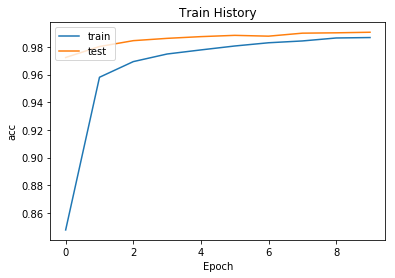

In [35]:
show_train_history(train_history,'acc','val_acc')      #进行准确率评估

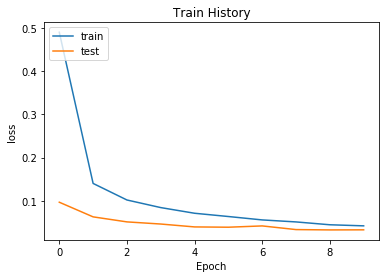

In [37]:
show_train_history(train_history,'loss','val_loss')    #进行误差评估

In [64]:
scores = model.evaluate (x_Test4D_normalize,y_TestOnehot)    #评估模型准确率
scores[1]

10000/10000 [==============================] - 2s 235us/step


0.9911

In [66]:
prediction=model.predict_classes(x_Test4D_normalize)         #执行预测

In [67]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [69]:
import matplotlib.pyplot as plt                             #创建plot_images_labels_prediction函数
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num =25
    for i in range(0, num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title='label='+str(prediction[idx])
        if len(prediction)>0:
            title+=',predict='+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show

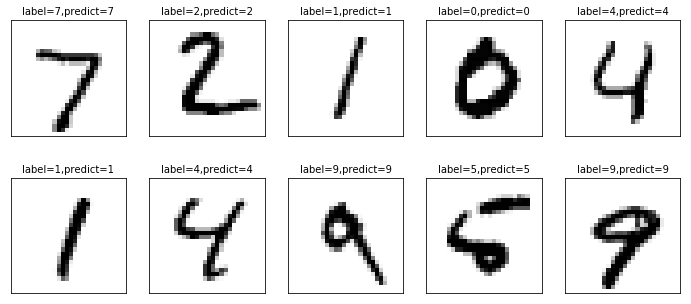

In [70]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)          #显示前10项预测结果

In [71]:
import pandas as pd                   #导入pandas并使用pandas.crosstab建立混淆矩阵
pd.crosstab(y_Test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,2,1,0,0
1,0,1130,1,0,0,1,1,1,1,0
2,3,1,1026,0,0,0,0,2,0,0
3,0,0,0,1003,0,3,0,2,2,0
4,0,0,0,0,976,0,1,0,0,5
5,1,0,0,4,0,884,2,0,0,1
6,6,2,0,1,2,1,946,0,0,0
7,0,2,4,2,0,0,0,1016,1,3
8,3,0,3,2,1,1,0,2,957,5
